<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

В этом ноутбуке Вам предстоит самостоятельно попрактиковаться в написаноо нейросетей для распознавания датасета, похожего на MNIST, но более интересного -- чёрно-белых изображений одежды.

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png" width="400" >

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [88]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms

In [90]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = tuple(str(i) for i in range(10))
#classes = {0:	'T-shirt/top', 1:	'Trouser', 2:	'Pullover', 3:	'Dress', 4:	'Coat', 5:	'Sandal', 6:	'Shirt', 7:	'Sneaker', 8:	'Bag', 9:	'Ankle boot'}

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [91]:
classes = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover',3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag',9:'Ankle boot'}
classes

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

<br>Посмотрите на датасет.
* Сколько в нём классов?
* Сколько картинок в train? В test?
* Равномерно ли распределено количество классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Сколько классов в датасете?

In [93]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

В датасете 10 классов

Сколько картинок в train? В test?

In [94]:
trainloader.dataset.data.shape

torch.Size([60000, 28, 28])

In [95]:
testloader.dataset.data.shape

torch.Size([10000, 28, 28])

В train 60000 картинок, в test 10000 картинок

Равномерно ли распределено количество классов в train датасете (это можно понять, поработав с полем train_data у переменной trainset)? в test?

In [96]:
#распределение тензоров в train
for data in trainloader.dataset:
     print('Labels:', data[1])
     break

Labels: 9


In [97]:
#распределение тензоров в test
for data in testloader.dataset:
     print('Labels:', data[1])
     break

Labels: 9


Классы в train и test датасетах перемешены в каждом батче

Выведите несколько картинок с помощью pyplot

In [81]:
#print(f"Количество строк в y_train по классам: {np.bincount(trainloader)}")
#print(f"Количество строк в y_test по классам: {np.bincount(testloader.dataset.data)}")

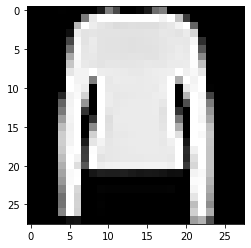

In [82]:
i=np.random.randint(low=0, high=60000)
plt.imshow(trainloader.dataset.data[i].numpy(), cmap='gray')

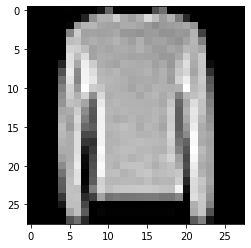

In [83]:
i=np.random.randint(low=0, high=60000)
plt.imshow(trainloader.dataset.data[i].numpy(), cmap='gray')

<h2 style="text-align: center;"><b>Задание</b></h2>

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1. MLP, классифицирующий этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [98]:
import torch.nn as nn
import torch.nn.functional as F 

Настройка параметров сверточной сети

In [99]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)  # !!!
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 4 * 4 * 16)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<br>Код обучения слоя:

In [100]:
from tqdm import tqdm_notebook

In [101]:
# объявляем сеть
net = SimpleConvNet()

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm_notebook(range(3)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


[1,  2000] loss: 1.288
[1,  4000] loss: 0.810
[1,  6000] loss: 0.734
[1,  8000] loss: 0.680
[1, 10000] loss: 0.654
[1, 12000] loss: 0.659
[1, 14000] loss: 0.612



[2,  2000] loss: 0.590
[2,  4000] loss: 0.567
[2,  6000] loss: 0.563
[2,  8000] loss: 0.544
[2, 10000] loss: 0.513
[2, 12000] loss: 0.516
[2, 14000] loss: 0.506



[3,  2000] loss: 0.477
[3,  4000] loss: 0.489
[3,  6000] loss: 0.478
[3,  8000] loss: 0.469
[3, 10000] loss: 0.463
[3, 12000] loss: 0.450
[3, 14000] loss: 0.433


Обучение закончено


Тест на всём тестовом датасете, используя метрику accuracy_score:

In [105]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total
[i]))
print('Total Accurucy:', sum(class_correct)/sum(class_total))
        

Accuracy of T-shirt/top : 89 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 67 %
Accuracy of Dress : 82 %
Accuracy of  Coat : 66 %
Accuracy of Sandal : 95 %
Accuracy of Shirt : 52 %
Accuracy of Sneaker : 94 %
Accuracy of   Bag : 95 %
Accuracy of Ankle boot : 90 %
Total Accurucy: 0.8305


Результат: нейронная сеть с двумя сверточными слоями позволяет получить дсравнительно высокую точность при классификации изображений по классам. По семи из десяти классов точность на тесовой выборке превысила 80%. Средняя точность по всем классам 83%.

Тест на случайно выбранных картинках из тестового датасета, с выводом предсказанного класса в качестве
заголовка рисунка.

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


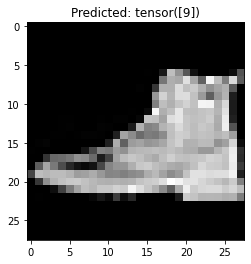

In [103]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.test_data[index].numpy()
    plt.imshow(image, cmap='gray')
    
    y_pred = net(torch.Tensor(image).view(1, 1, 28, 28))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {predicted}')

visualize_result(i)

За десять попыток модель не сделала ни одной ошибки

Настройка параметров MLP сети

In [106]:
class SimpleMLPNet(nn.Module):
    def __init__(self):
        super(SimpleMLPNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 120) # !!!
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Код обучения слоя:

In [110]:
from tqdm import notebook
# объявляем сеть
nets = SimpleMLPNet()
# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()
# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(nets.parameters(), lr=learning_rate)
# итерируемся
for epoch in notebook.tqdm(range(3)):
    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):
        # получаем текущий батч
        X_batch, y_batch = batch
        # обнуляем веса
        optimizer.zero_grad()
        # forward + backward + optimize
        y_pred = nets(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Обучение закончено')

[1,  2000] loss: 1.060
[1,  4000] loss: 0.636
[1,  6000] loss: 0.552
[1,  8000] loss: 0.539
[1, 10000] loss: 0.486
[1, 12000] loss: 0.485
[1, 14000] loss: 0.470



[2,  2000] loss: 0.447
[2,  4000] loss: 0.436
[2,  6000] loss: 0.415
[2,  8000] loss: 0.424
[2, 10000] loss: 0.434
[2, 12000] loss: 0.431
[2, 14000] loss: 0.396



[3,  2000] loss: 0.394
[3,  4000] loss: 0.392
[3,  6000] loss: 0.396
[3,  8000] loss: 0.391
[3, 10000] loss: 0.393
[3, 12000] loss: 0.366
[3, 14000] loss: 0.373


Обучение закончено


Тест на всём тестовом датасете, используя метрику accuracy_score:

In [111]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = nets(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            #print(labels[i])
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
print('Total Accurucy:', sum(class_correct)/sum(class_total))

Accuracy of T-shirt/top : 78 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 64 %
Accuracy of Dress : 87 %
Accuracy of  Coat : 85 %
Accuracy of Sandal : 94 %
Accuracy of Shirt : 64 %
Accuracy of Sneaker : 93 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 95 %
Total Accurucy: 0.8572


Результат: нейронная сеть с тремя полносвязанными слоями позволяет получить более высокую точность при классификации изображений по классам. Средняя точность по всем классам 85%.

**Вывод:** по качеству обеих нейронных сетей: и сверточная и MLP
нейронные сети показали схожую точность, при небольшом
преимуществе у MLP - 85% против 83% у сверточной сети на тестовом
датасете FashionMNIST.